In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<IPython.core.display.Javascript object>

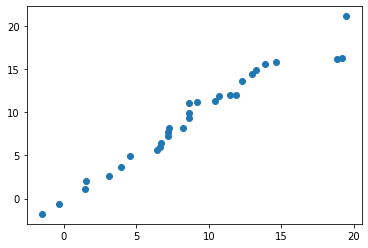

<IPython.core.display.Javascript object>

In [23]:
np.random.seed(42)

x = sorted(np.random.normal(10, 6, 30))
y = sorted(np.random.normal(10, 6, 30))
z = np.random.normal(10, 6, 30)
a = sorted(np.random.normal(10, 6, 30), reverse=True)
plt.scatter(x, y)

In [24]:
df = pd.DataFrame({"x": x, "y": y, "z": z, "a": a})
df.head()

,x,y,z,a
0,-1.479681,-1.758021,7.124955,24.779453
1,-0.349507,-0.578241,8.886046,21.317115
2,1.451511,1.128868,3.361990,16.856937
3,1.526178,2.030884,2.822760,15.811870
4,3.094039,2.674938,14.875155,14.511598


<IPython.core.display.Javascript object>

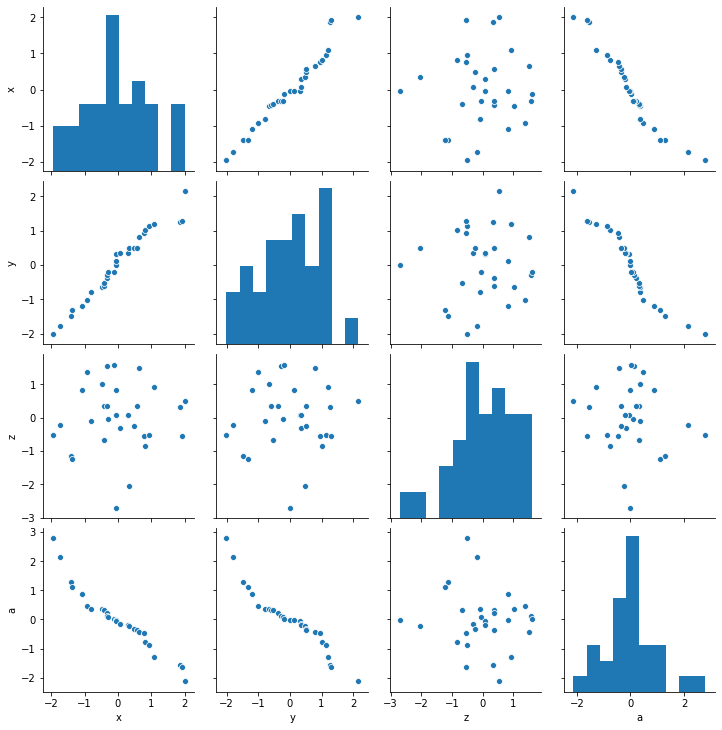

<IPython.core.display.Javascript object>

In [25]:
scaler = StandardScaler()
scaled = scaler.fit_transform(df)
scaled = pd.DataFrame(scaled, columns=df.columns)

sns.pairplot(data=scaled)

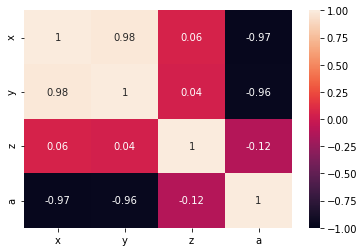

<IPython.core.display.Javascript object>

In [35]:
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)

(-4, 4)

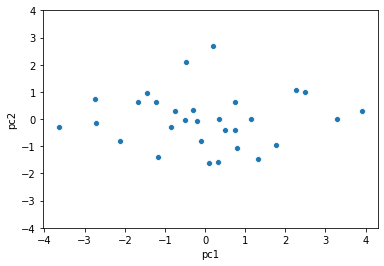

<IPython.core.display.Javascript object>

In [34]:
pca = PCA()
pca.fit(scaled)

pcs = pca.transform(scaled)
pcs = pd.DataFrame(pcs, columns=["pc1", "pc2", "pc3", "pc4"])

sns.scatterplot("pc1", "pc2", data=pcs)
plt.ylim([-4, 4])

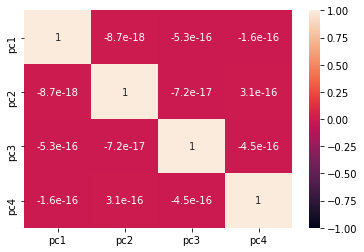

<IPython.core.display.Javascript object>

In [36]:
sns.heatmap(pcs.corr(), vmin=-1, vmax=1, annot=True)

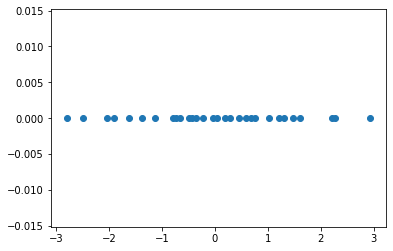

<IPython.core.display.Javascript object>

In [17]:
pcs["zero"] = 0

plt.scatter(pcs["pc1"], pcs["zero"])

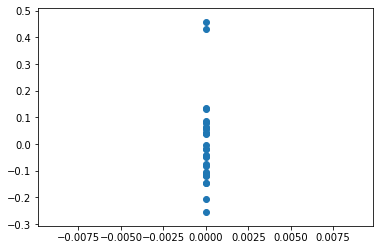

<IPython.core.display.Javascript object>

In [19]:
pcs["zero"] = 0

plt.scatter(pcs["zero"], pcs["pc2"])

In [31]:
pca.explained_variance_ratio_

array([0.73495984, 0.24882988, 0.01080157, 0.00540871])

<IPython.core.display.Javascript object>

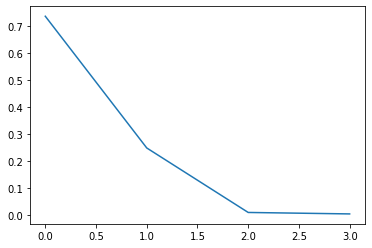

<IPython.core.display.Javascript object>

In [33]:
plt.plot(pca.explained_variance_ratio_)

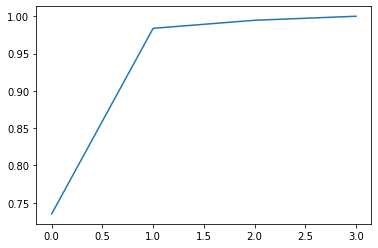

<IPython.core.display.Javascript object>

In [32]:
cumsum = np.cumsum(pca.explained_variance_ratio_)

plt.plot(cumsum)